# Wprowadzenie

Skrypt pokazuje jak użyć pakietu SciKit do wizualizacji danych na przykładzie zestawu danych zawierającego obrazy cyfr pisanych ręcznie.

In [1]:
% matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

from sklearn import (datasets, decomposition, ensemble, manifold, random_projection)

In [2]:
def plot_digits(X, y):
    X = (X - np.min(X, 0)) / (np.max(X, 0) - np.min(X, 0))

    plt.figure(figsize=(12, 9))

    for i in xrange(X.shape[0]):
        plt.text(X[i, 0], X[i, 1], str(y[i]), color=plt.cm.Set1(0.1*y[i]), fontdict={'weight':'bold', 'size':8})

    plt.xticks([])
    plt.yticks([])
    plt.show()

# Wczytanie danych

In [3]:
digits = datasets.load_digits()
X = digits.data
y = digits.target
N, d = X.shape

# Wyświetlenie przykładowych cyfr

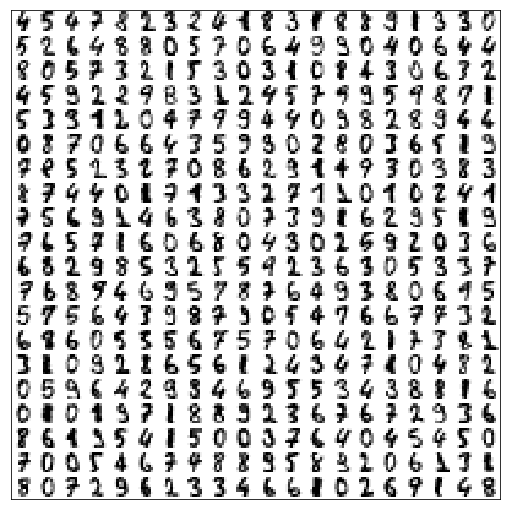

In [4]:
M = 20
image = np.zeros((10 * M, 10 * M))
order = np.random.permutation(N)
for i in xrange(M):
    for j in range(M):
        image[10*i+1:10*i+9, 10*j+1:10*j+9] = X[order[i*M+j], :].reshape((8, 8))

plt.figure(figsize=(9, 9))
plt.imshow(image, cmap=plt.cm.binary)
plt.xticks([])
plt.yticks([])
plt.show()

# Rzut na dwie losowo wybrane osie

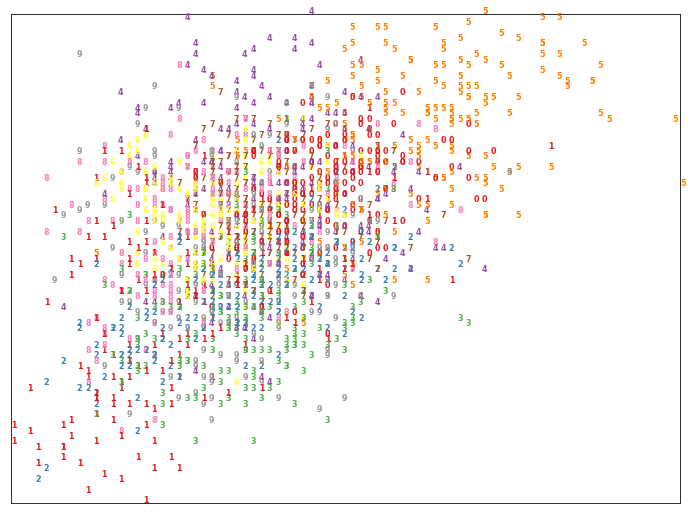

In [5]:
X_projected = random_projection.SparseRandomProjection(n_components=2).fit_transform(X)
plot_digits(X_projected, digits.target)

# Principal Component Analysis (PCA)

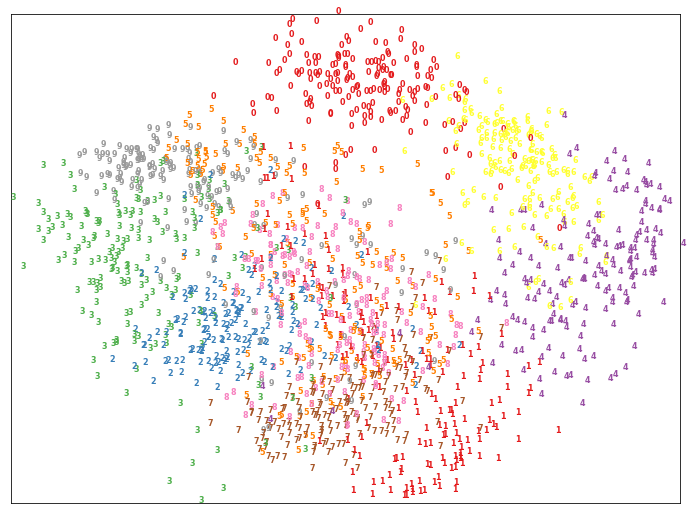

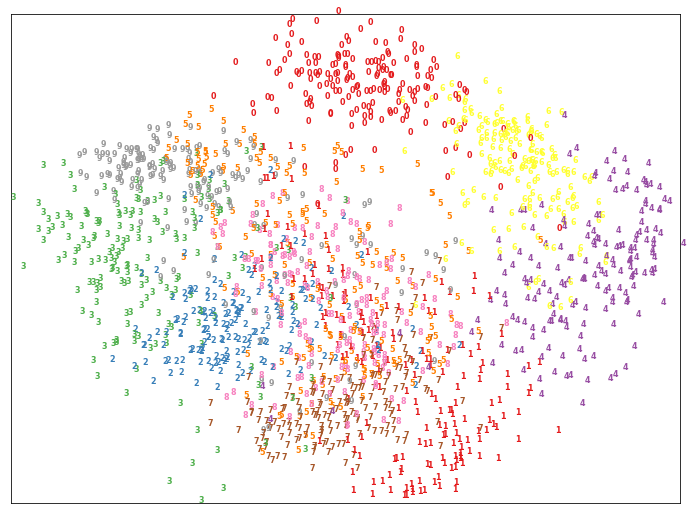

In [57]:
X_pca = decomposition.PCA(n_components=2, svd_solver='auto').fit_transform(X)
plot_digits(X_pca, digits.target)

X_pca_ = decomposition.PCA(n_components=11, svd_solver='arpack').fit_transform(X)
plot_digits(X_pca_, digits.target) # no diff
# svd_solver : string {‘auto’, ‘full’, ‘arpack’, ‘randomized’}

# X_pca_ = decomposition.PCA(n_components=2, whiten=False).fit_transform(X)
# plot_digits(X_pca_, digits.target) # no diff


# Kernel Principal Component Analysis (KPCA)

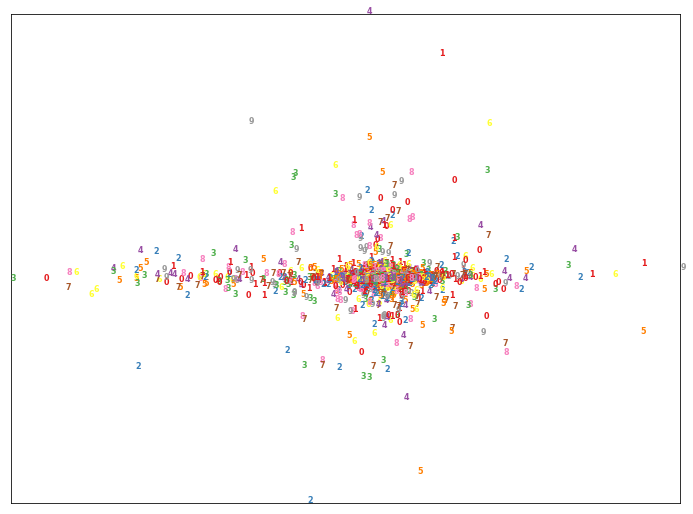

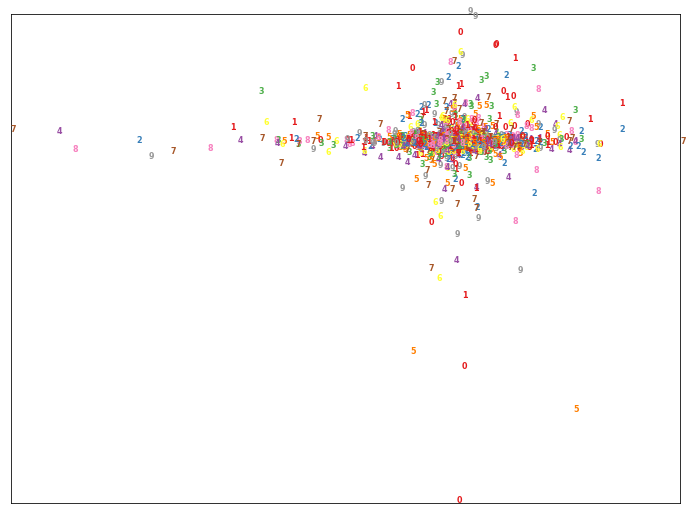

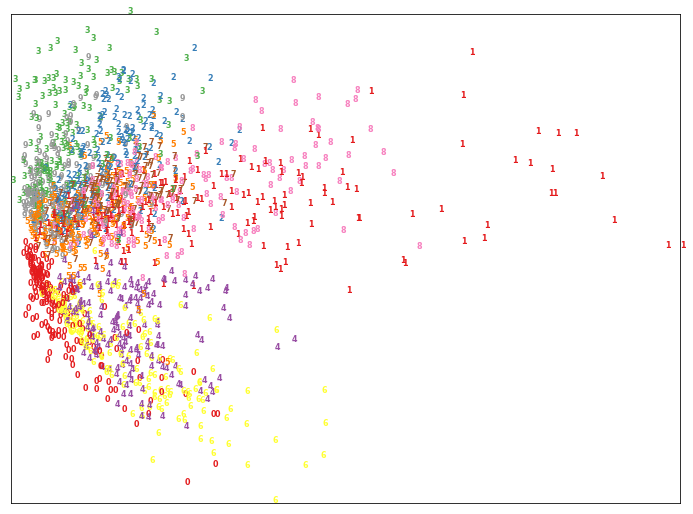

In [63]:
X_kpca = decomposition.KernelPCA(n_components=2, kernel="rbf", gamma=10).fit_transform(X)
plot_digits(X_kpca, digits.target)

X_kpca_ = decomposition.KernelPCA(n_components=2, kernel="rbf", gamma=7).fit_transform(X)
plot_digits(X_kpca_, digits.target)


X_kpca_ = decomposition.KernelPCA(n_components=2, kernel="poly", degree=5).fit_transform(X)
plot_digits(X_kpca_, digits.target)

# gamma : float, default=1/n_features
# Kernel coefficient for rbf, poly and sigmoid kernels. Ignored by other kernels.
# kernel : “linear” | “poly” | “rbf” | “sigmoid” | “cosine” | “precomputed”

# Isomap

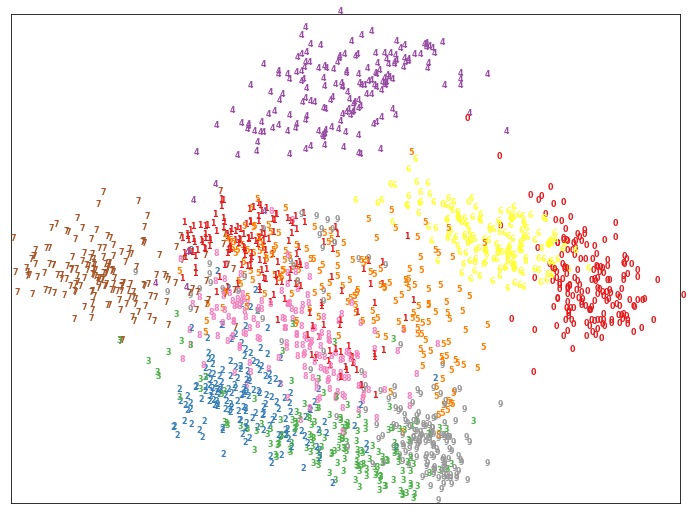

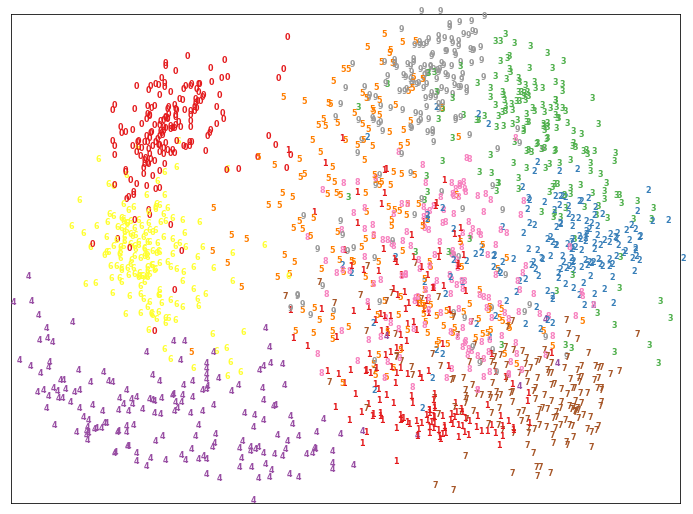

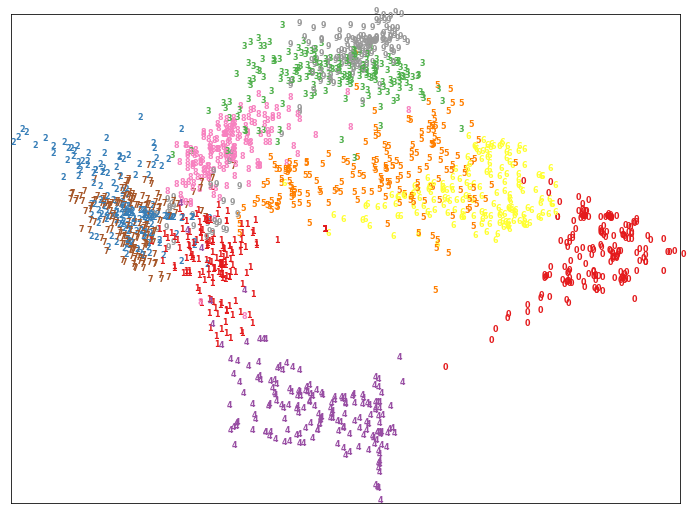

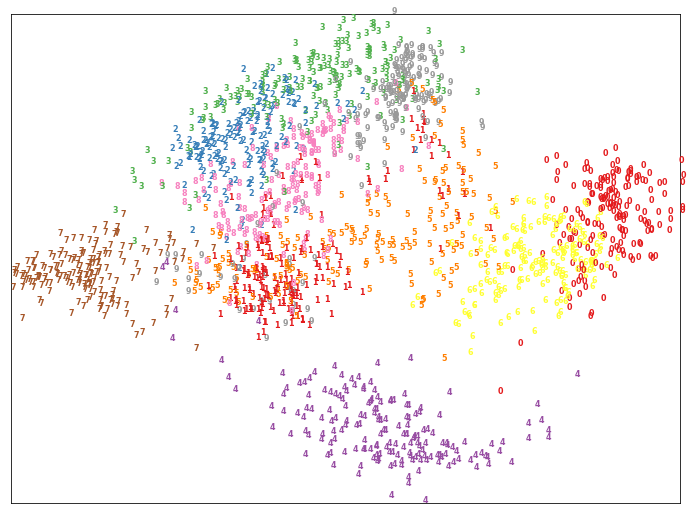

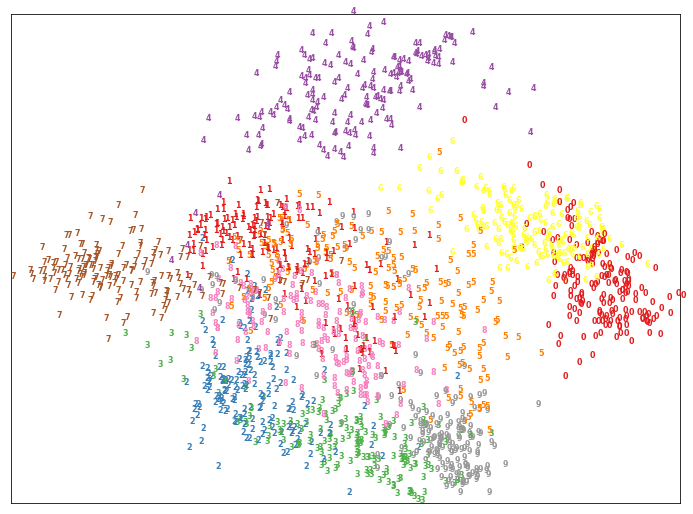

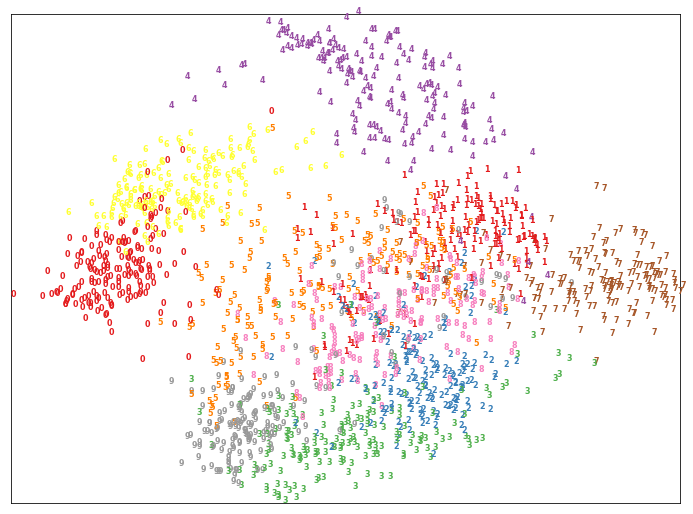

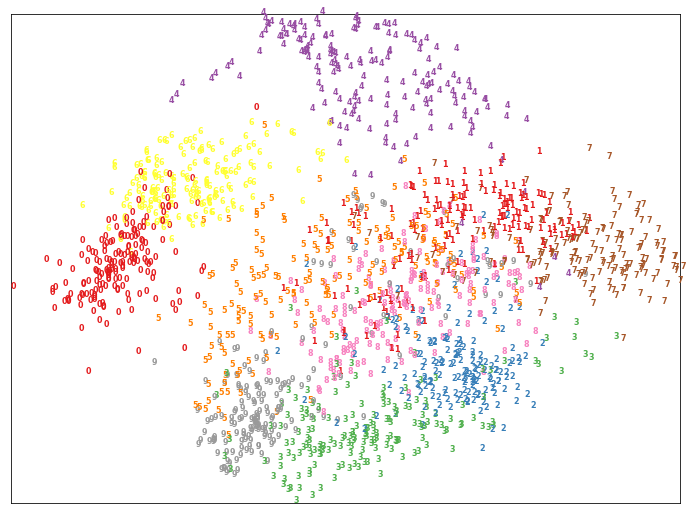

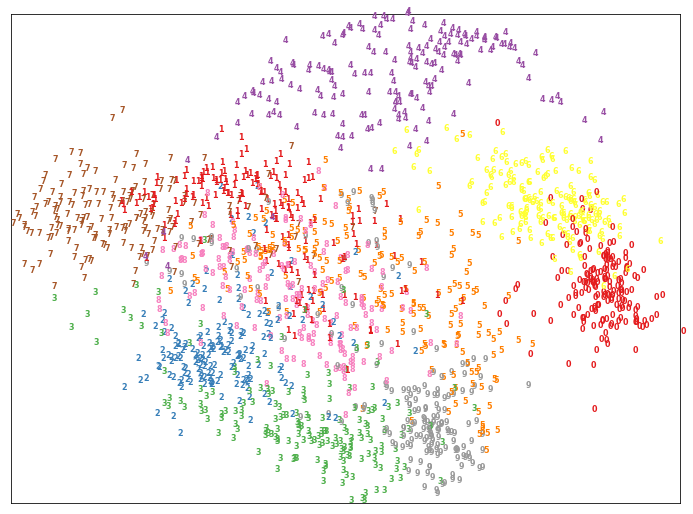

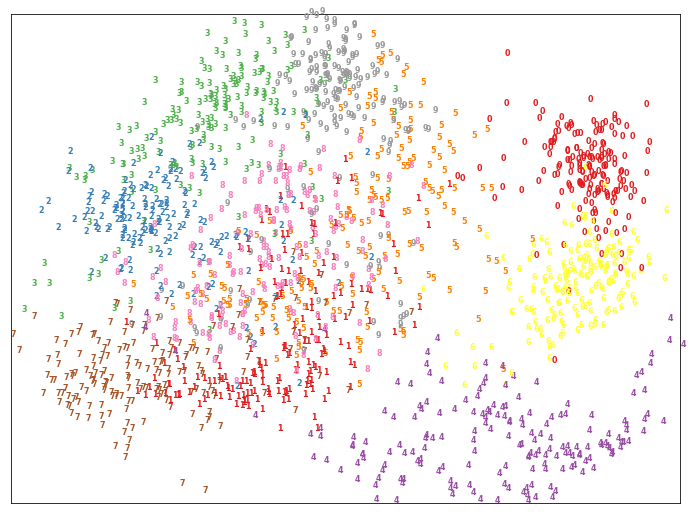

In [65]:
X_iso = manifold.Isomap(n_neighbors=30, n_components=2).fit_transform(X)
plot_digits(X_iso, digits.target)

X_iso_ = manifold.Isomap(n_neighbors=130, n_components=2).fit_transform(X)
plot_digits(X_iso_, digits.target)

for n in xrange(5, 100, 15):
    X_iso_ = manifold.Isomap(n_neighbors=n, n_components=2).fit_transform(X)
    plot_digits(X_iso_, digits.target)

# Locally Linear Embedding (LLE)

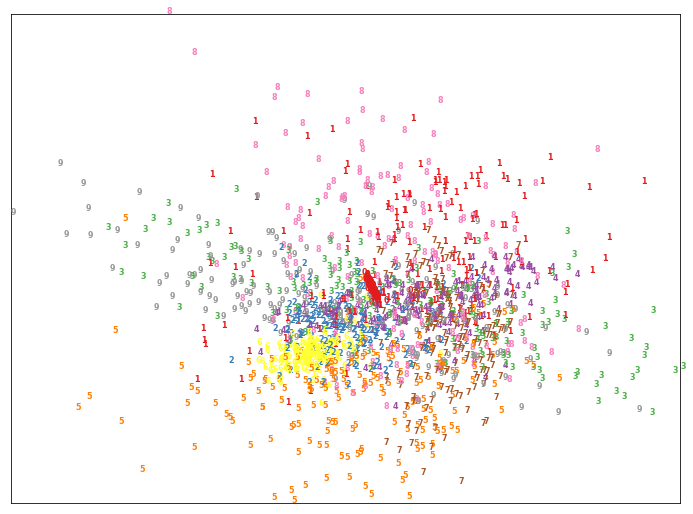

In [9]:
X_lle = manifold.LocallyLinearEmbedding(30, n_components=2).fit_transform(X)
plot_digits(X_lle, digits.target)


for n in xrange(5, 100, 15):
    X_lle_ = manifold.Isomap(n_neighbors=n, n_components=2).fit_transform(X)
    plot_digits(X_lle_, digits.target)

# Multidimensional Scaling (MDS)

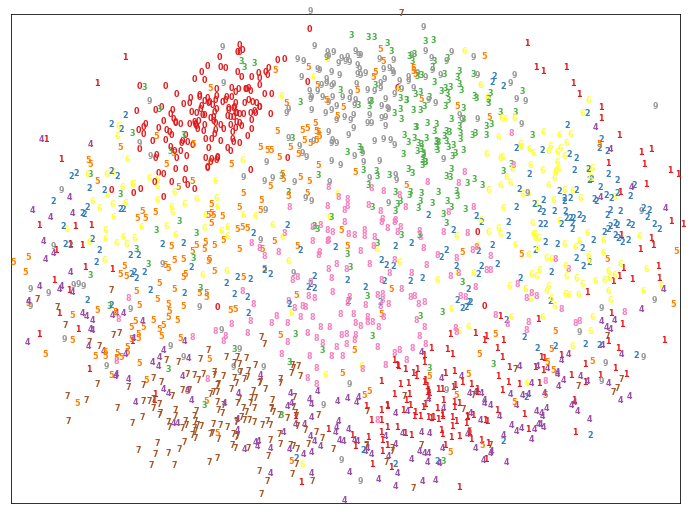

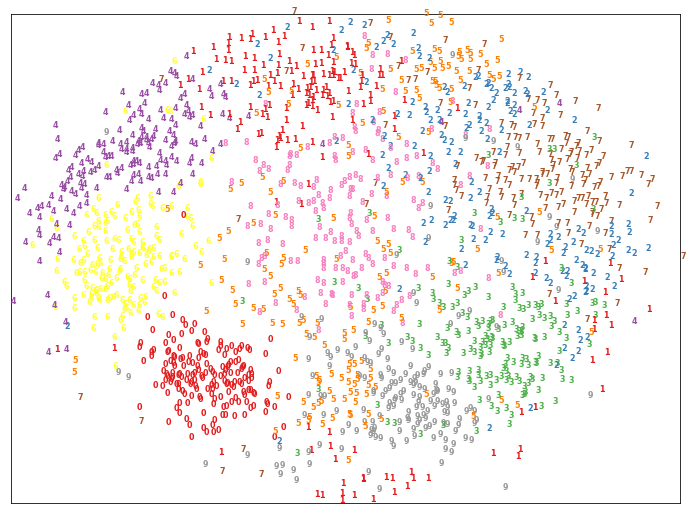

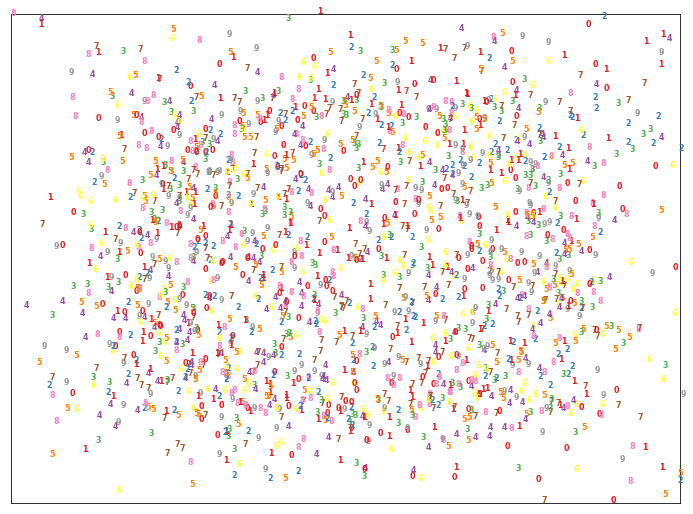

In [69]:
X_mds = manifold.MDS(n_components=2, n_init=1, max_iter=100).fit_transform(X)
plot_digits(X_mds, digits.target)

X_mds_ = manifold.MDS(n_components=2, n_init=1, metric=False).fit_transform(X)
plot_digits(X_mds_, digits.target)

X_mds_ = manifold.MDS(n_components=2, n_init=1, max_iter=500).fit_transform(X)
plot_digits(X_mds_, digits.target)

X_mds_ = manifold.MDS(n_components=2, n_init=10, max_iter=500).fit_transform(X)
plot_digits(X_mds_, digits.target)

# t-distributed Stochastic Neighbor Embedding (t-SNE)

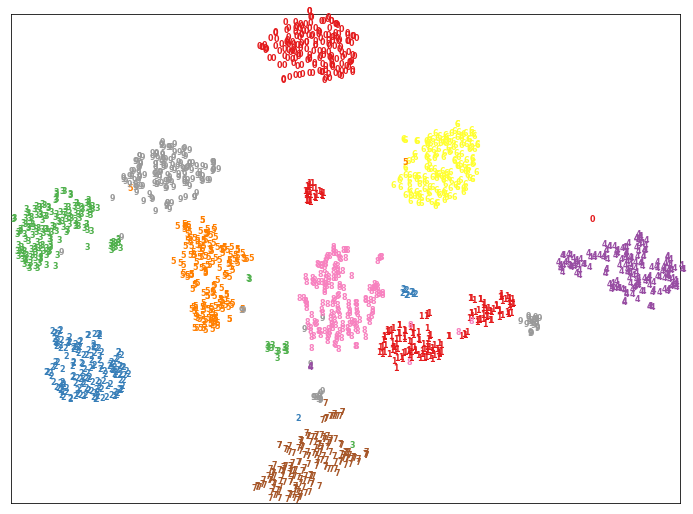

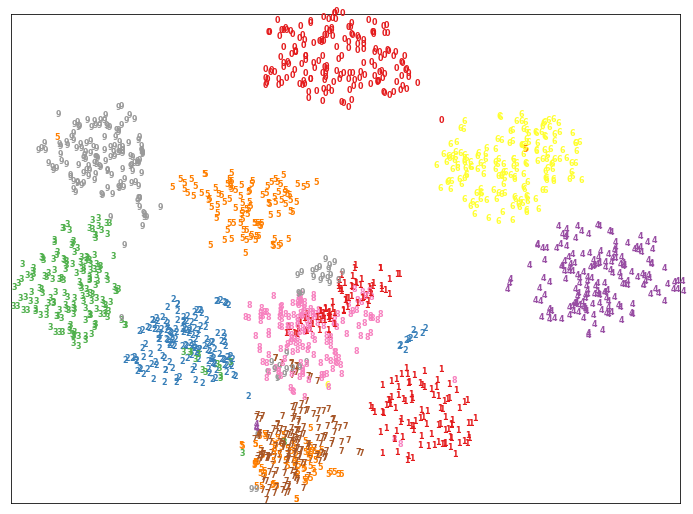

In [68]:
X_tsne = manifold.TSNE(n_components=2, init='pca').fit_transform(X)
plot_digits(X_tsne, digits.target)

X_tsne_ = manifold.TSNE(n_components=3, init='pca').fit_transform(X)
plot_digits(X_tsne_, digits.target)

X_tsne_ = manifold.TSNE(n_components=2, early_exaggeration=7.0, init='pca').fit_transform(X)
plot_digits(X_tsne_, digits.target)

X_tsne_ = manifold.TSNE(n_components=2, perplexity=15.0, init='pca').fit_transform(X)
plot_digits(X_tsne_, digits.target)

X_tsne_ = manifold.TSNE(n_components=2, learning_rate=25.0, init='pca').fit_transform(X)
plot_digits(X_tsne_, digits.target)

## Task 2.

In [48]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

def knn_cross_valid_mean_err(X, y):
    knn = KNeighborsClassifier(n_neighbors = 7)
    print cross_val_score(knn, X, y)
    
def test_data(X, y, msg):
    print 'result for', msg
    knn_cross_valid_mean_err(X, y)
    print '---'

In [51]:
test_data(X, y, 'knn on original data')
test_data(X_pca, y, 'knn on pca data')
test_data(X_kpca, y, 'knn on kpca data')
test_data(X_iso, y, 'knn on iso data')
test_data(X_lle, y, 'knn on lle data')
test_data(X_mds, y, 'knn on mds data')
test_data(X_tsne, y, 'knn on tsne data')

result for knn on original data
[ 0.95016611  0.96327212  0.9647651 ]
---
result for knn on pca data
[ 0.57973422  0.63439065  0.61073826]
---
result for knn on kpca data
[ 0.12126246  0.10183639  0.09060403]
---
result for knn on iso data
[ 0.72093023  0.7245409   0.72986577]
---
result for knn on lle data
[ 0.46677741  0.49749583  0.47483221]
---
result for knn on mds data
[ 0.63621262  0.65776294  0.66946309]
---
result for knn on tsne data
[ 0.96511628  0.98998331  0.96644295]
---
